In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
target='Survived'

x = data.drop(target, axis=1)
y = data[target]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 컬럼명 변경

In [45]:
data_co = data.copy()

data_co.rename(columns={'Age':'aage'}, inplace=True)
data_co.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'aage', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 데이터 타입 변환

In [39]:
data_co = data.copy()
data_co.info()
print('\n')

data_co['Age'] = data_co['Age'].astype(object)
data_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Surviv

## 데이터 정렬

#### 내림차순, 오름차순

In [16]:
data_co = data.copy()

data_co.sort_values('Age', ascending=False, inplace=True)  # 'Age'별 내림차순
data_co.reset_index(drop=True, inplace=True)               # 인덱스 초기화
data_co

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
3,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
887,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
888,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
889,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [21]:
data_co = data.copy()

data_co.sort_values(['Pclass', 'Fare'], ascending=[False, True], inplace=True)        # 'Pclass' : 내림차순 / 'Fare' : 오름차순
data_co.reset_index(drop=True, inplace=True)
data_co.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
1,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
2,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
3,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
4,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
5,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
6,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
7,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
8,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
9,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S


#### Pclass = 1,2 정렬

In [15]:
data[data['Pclass'].isin([1,2])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### Pclass = 2 인 Sex, Fare 열

In [19]:
data.loc[data['Pclass'] == 2, ['Sex', 'Fare']]

,Sex,Fare
9,female,30.0708
15,female,16.0000
17,male,13.0000
20,male,26.0000
21,male,13.0000
...,...,...
866,female,13.8583
874,female,24.0000
880,female,26.0000
883,male,10.5000


#### Groupby

#### Sex, Pclass별 생존율

In [45]:
tmp = data.groupby(['Sex', 'Pclass'])[['Survived']].mean()
tmp

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

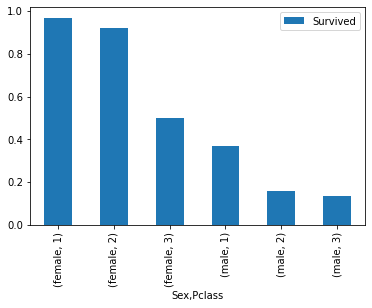

In [41]:
tmp.plot.bar()
plt.show()

In [43]:
# Pclass별 Fare의 평균

data.groupby('Pclass', as_index=False)[['Fare']].mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


## 결측치 처리

#### 평균

In [31]:
data_co = data.copy()
data_co['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
data_co = data.copy()

mean = data_co['Age'].mean()                   # 평균
median = data_co['Age'].median()               # 중앙값
std = data_co['Age'].std()                     # 표준편차
var = data_co['Age'].var()                     # 분산

data_co['Age'].fillna(mean, inplace=True)
data_co.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 앞 값

In [32]:
data_co = data.copy()

data_co['Age'].fillna(method='ffill', inplace=True)     # 빈 값의 앞 데이터로 채움.
data_co.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 최빈값

In [8]:
data_co = data.copy()

more = data_co['Age'].value_counts().idxmax()
data_co['Age'].fillna(more, inplace=True)
data_co.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 선형보간법

In [14]:
data_co = data.copy()

data_co['Age'].interpolate(method='linear', inplace=True)
data_co.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 삭제

In [51]:
data_co = data.copy()
data_co.info()
print('\n')

data_co.dropna(subset=['Age'], axis=0, inplace=True)
data_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Surviv

## 데이터 삭제

In [13]:
data_co = data.copy()
print(data_co.isna().sum())
print('\n')

cols = ['Embarked', 'Fare', 'Parch']
data_co.drop(columns=cols, axis=1, inplace=True)
print(data_co.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Ticket           0
Cabin          687
dtype: int64


## 데이터 집단화

#### 단순 계산

In [19]:
data_co = data.copy()

data_co['Age_grp'] = (data_co['Age']//10)*10
data_co['Age_grp'].value_counts()

20.0    220
30.0    167
10.0    102
40.0     89
0.0      62
50.0     48
60.0     19
70.0      6
80.0      1
Name: Age_grp, dtype: int64

#### cut

In [20]:
data_co = data.copy()

b = [0,30,60,90]
l = ['A','B','C']

data_co['Age'] = pd.cut(data_co['Age'], bins=b, labels=l)
data_co['Age'].value_counts()

A    409
B    283
C     22
Name: Age, dtype: int64

## 원 핫 인코딩

#### 가변수화

In [9]:
# one-hot encoding
data_co = data.copy()

cols = ['Sex']
data_co = pd.get_dummies(data_co, columns=cols, drop_first=True)
data_co

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


## 라벨 인코딩

#### LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder

data_co = data.copy()
encoder = LabelEncoder()

print(data_co['Embarked'].value_counts())
data_co['Embarked'] = encoder.fit_transform(data_co['Embarked'])
data_co['Embarked'].value_counts()

# 범주화 데이터를 수치화로 변환
# 회귀 모델에선 사용 X

S    644
C    168
Q     77
Name: Embarked, dtype: int64


2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

#### map

In [34]:
data_co = data.copy()

data_co['Embarked'] = data_co['Embarked'].map({'S':0,
                                               'C':1,
                                               'Q':2})
data_co

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1.0


## 정규화

In [19]:
data_co = data.copy()

cols = ['Age', 'Fare']
data_co[cols] = (data_co[cols] - data_co[cols].min()) / (data_co[cols].max() - data_co[cols].min())
data_co[cols]

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
886,0.334004,0.025374
887,0.233476,0.058556
888,NaN,0.045771
889,0.321438,0.058556


## 조인(Join)

In [38]:
pop1 = pd.read_csv('https://bit.ly/PopH01File', index_col='year')
pop2 = pd.read_csv('https://bit.ly/PopH02File', index_col='year')
pop3 = pd.read_csv('https://bit.ly/PopH03File', index_col='year')
pop1.head(3)

,k_male,k_female
year,,
1981,4160,4191
1982,4160,4191
1983,4160,4191


In [39]:
pop2.head(2)

,f_male,f_female
year,,
1985,7,6
1986,7,5


In [40]:
pop3.head(3)

,household,older_65
year,,
1981,1915,246
1982,2001,260
1983,2116,260


#### concat

- 인덱스 지정해줘야 함.
- 위아래로 합병

In [47]:
# 1981부터 시작
pop = pd.concat([pop1, pop2, pop3], join='outer', axis=1)
pop.head(3)

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1981,4160,4191,NaN,NaN,1915,246
1982,4160,4191,NaN,NaN,2001,260
1983,4160,4191,NaN,NaN,2116,260


In [48]:
# 1985부터 시작
pop = pd.concat([pop1, pop2, pop3], join='inner', axis=1)
pop.head(3)

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1985,4160,4191,7,6,2338,211
1986,4899,4888,7,5,2428,305
1987,5000,4979,6,5,2518,329


#### merge

- 인덱스 필요 x
- 좌우로 합병

In [50]:
pop = pd.merge(pop1, pop2, on='year', how='inner')           # 'year' 기준으로 1985부터 시작
pop.head(5)

,k_male,k_female,f_male,f_female
year,,,,
1985,4160,4191,7,6
1986,4899,4888,7,5
1987,5000,4979,6,5
1988,5156,5120,5,5
1989,5305,5261,6,5


In [54]:
pop = pd.merge(pop1, pop2, on='year', how='outer')          # 'year' 기준으로 1981부터 시작
pop = pd.merge(pop, pop3, on='year', how='outer')           # 'year' 기준으로 1981부터 시작
pop.head(5)

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1981,4160,4191,NaN,NaN,1915,246
1982,4160,4191,NaN,NaN,2001,260
1983,4160,4191,NaN,NaN,2116,260
1984,4160,4191,NaN,NaN,2246,275
1985,4160,4191,7.0,6.0,2338,211
